# Aufgabe: Statistische Grundlagen

Versuchen Sie, Diskriminierung beim Gehalt mit Census Datensatz aufzuzeigen.

### 1. Laden Sie den Datensatz mittels Pandas:

In [1]:
import pandas as pd
import os

In [2]:
census = pd.read_csv(os.path.join("..", "..", "..", "data", "census.csv"))
census.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'target'],
      dtype='object')

### 2. Führen Sie für alle relevante Features eine explorative Datenanalyse zusammen: erstellen Sie eine visuelle Übersicht über den Datensatz

In [3]:
# Entfernen der Spalten:

to_pop = ["occupation", "relationship", "capital-gain", "capital-loss", "native-country", "education", "workclass", "marital-status"]

for col in to_pop:
    census.pop(col)

# Numerische Werte:

sex_dict = {' Male': 1, ' Female': 0}
census["sex"] = census["sex"].replace(sex_dict)

race_dict = {' Asian-Pac-Islander': 4, ' White': 3, ' Black': 2, ' Amer-Indian-Eskimo':1, ' Other': 0}
census["race"] = census["race"].replace(race_dict)

# Sie können auch noch Education oder andere Features mitreinnehmen.

census.head()

/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_12844/1220003591.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  census["sex"] = census["sex"].replace(sex_dict)
/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_12844/1220003591.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  census["race"] = census["race"].replace(race_dict)


,age,race,sex,hours-per-week,target
0,39,3,1,40,<=50K
1,50,3,1,13,<=50K
2,38,3,1,40,<=50K
3,53,2,1,40,<=50K
4,28,2,0,40,<=50K


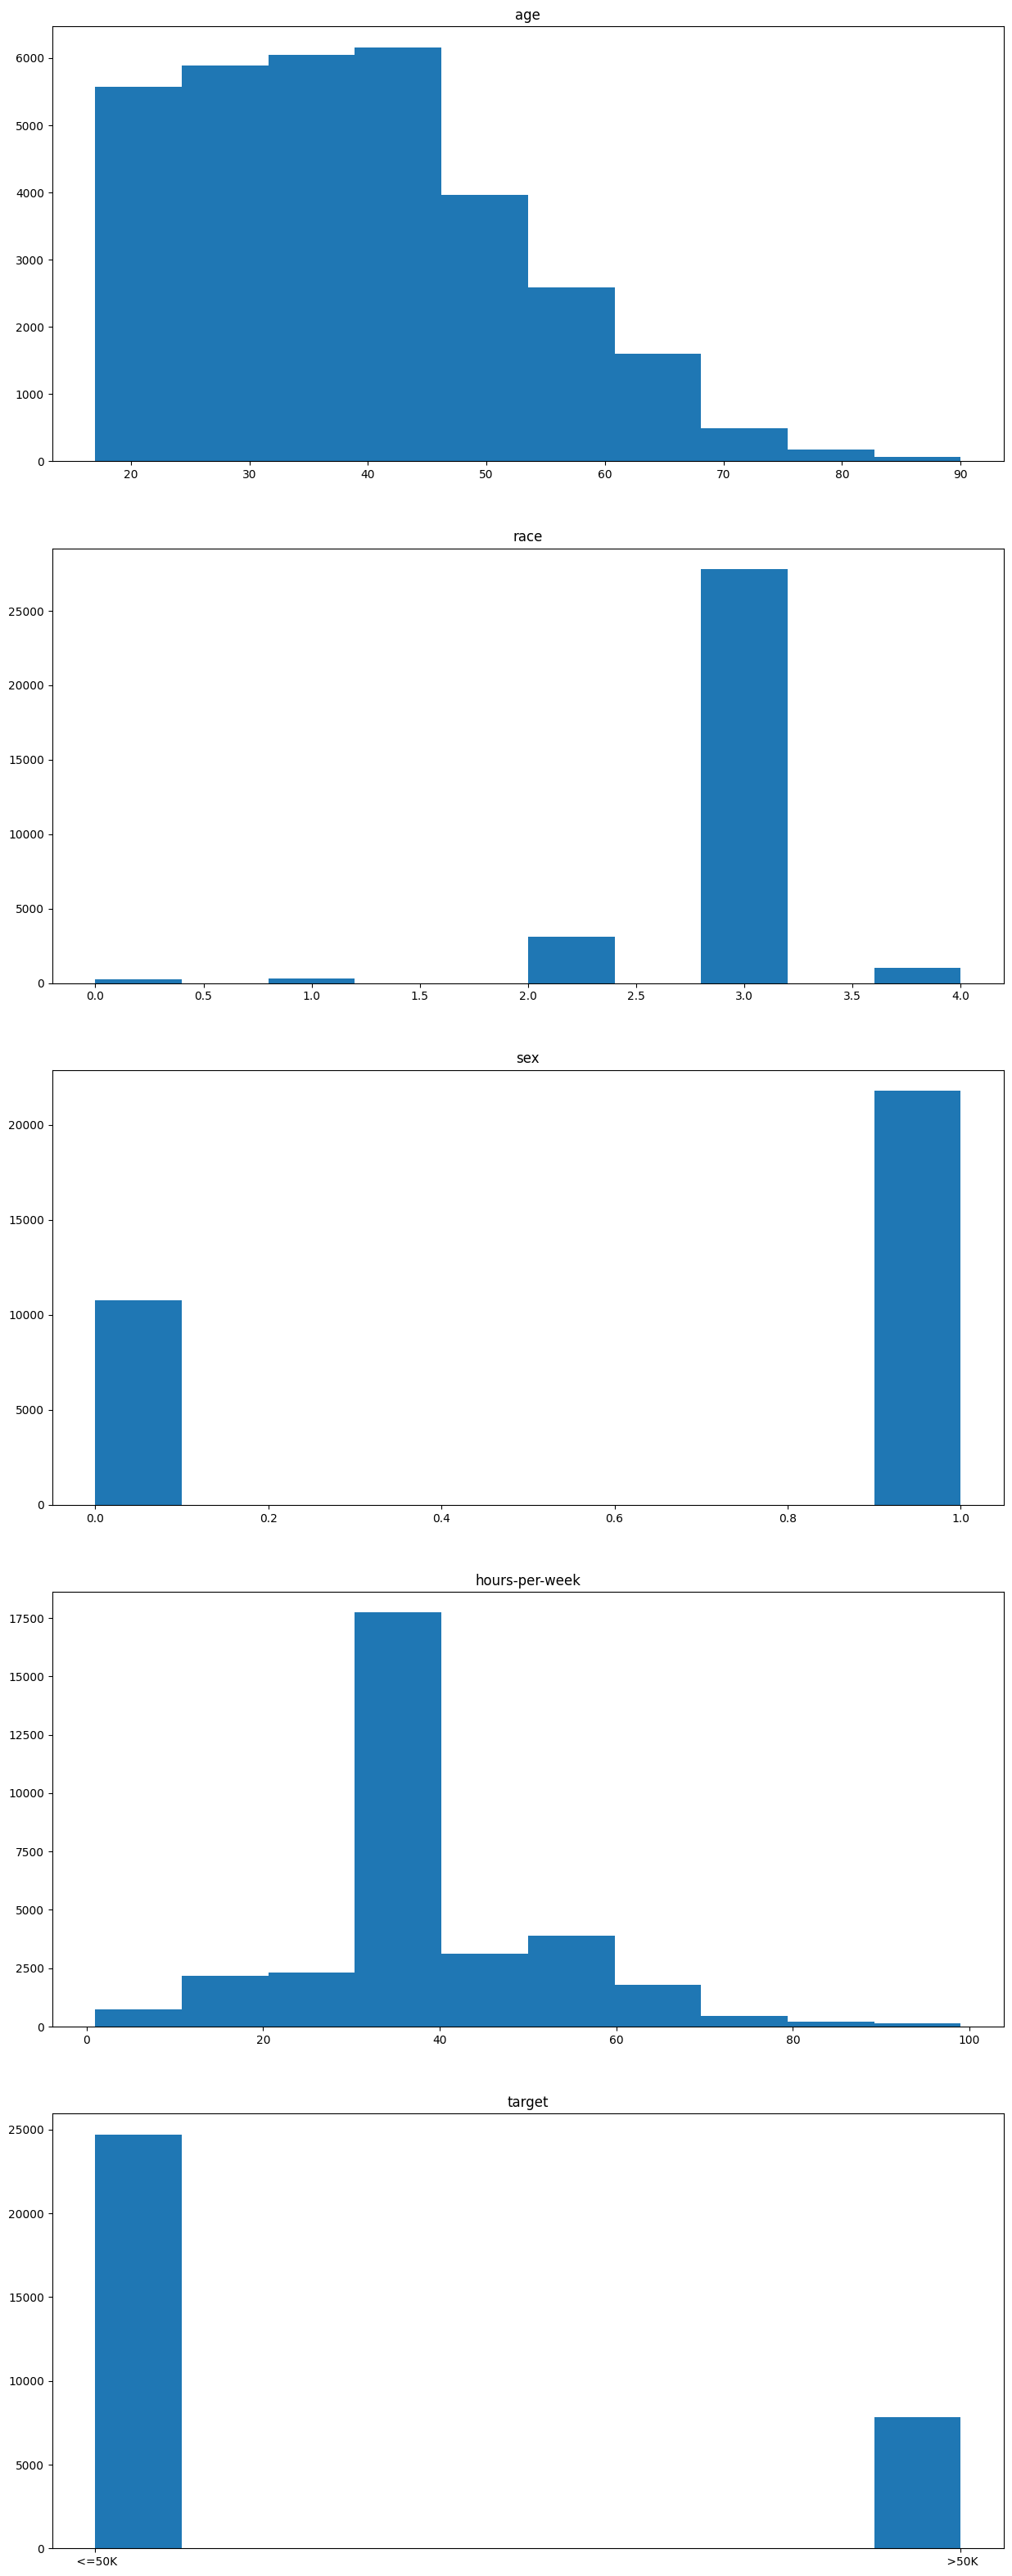

In [4]:
# Bibliothek matplotlib für die Darstellung
import matplotlib.pyplot as plt

# Bestimme einen Subplot mit der Anzahl der Spalten
# diese werden somit untereinander in einem Plot dargestellt
fig, axs = plt.subplots(len(census.columns), 1, figsize=(15,40))

# jede Achse enstpricht hier einem Subplot
# gehe durch die Spalten und erstelle jeweils ein Histogramm in einem Plot
for i in range(len(census.columns)):
    axs[i].hist(census[census.columns[i]])
    axs[i].set_title(census.columns[i])

# Darstellung des Plots
plt.show()

### 3. Finden Sie Auffälligkeiten im Datensatz. Welches Visualisierungstool könnte dabei hilfreich sein?


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

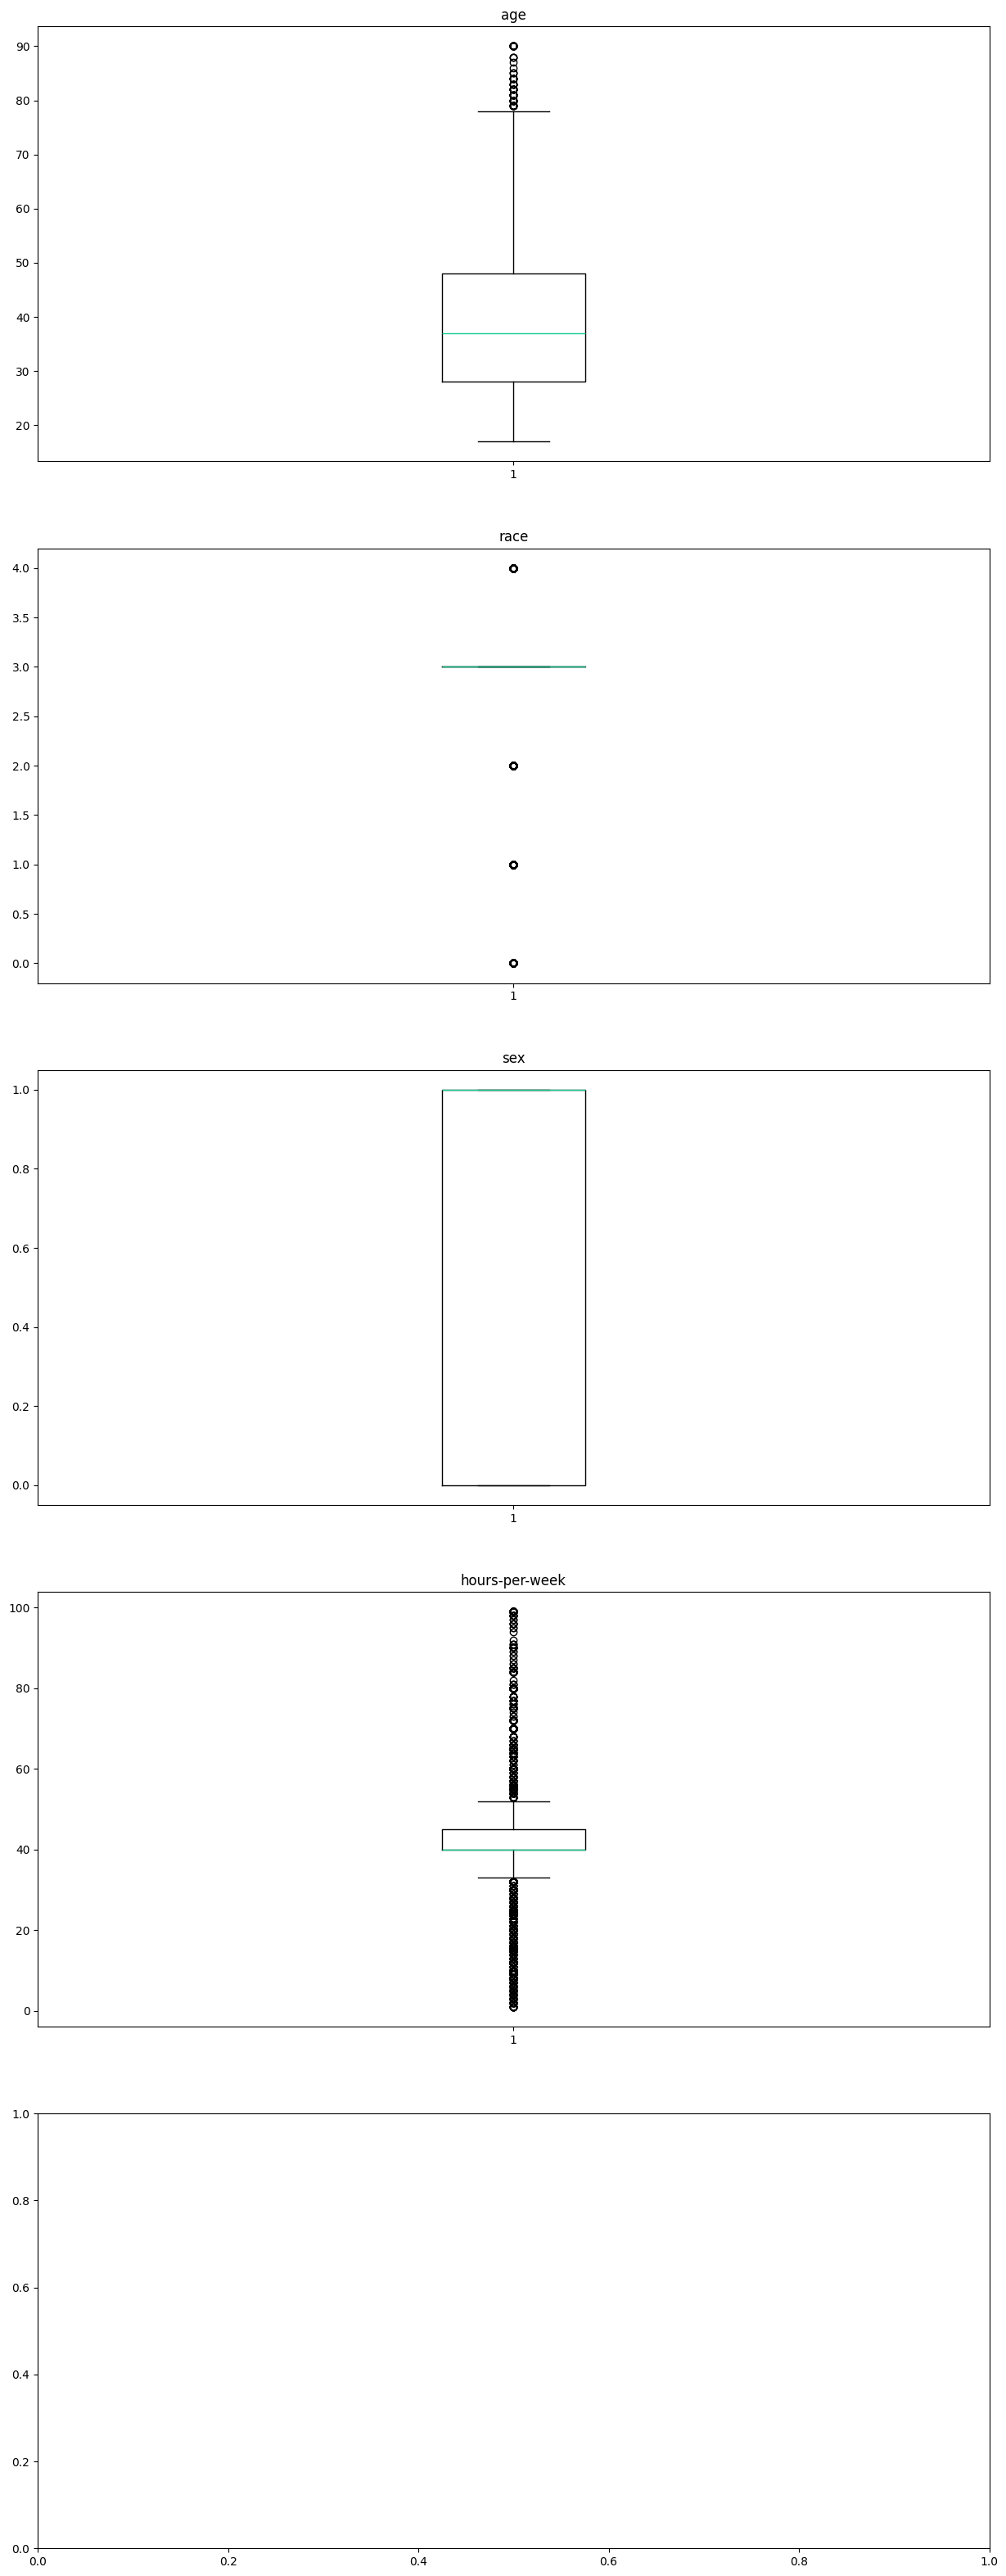

In [5]:
# wieder Erstellung des Subplots und definieren der Achsen
fig, axs = plt.subplots(len(census.columns), 1, figsize=(15,40))

# durch die Spalten des Datensatzes gehen und nummerieren kann in einem Schritt gelöst werden
for i, column in enumerate(census.columns):

    # Boxplots zeigen statistische Größen wie Median und Quartile, aber auch Ausreißer
    axs[i].boxplot(census[column], medianprops=dict(color="#1ACC94"))
    axs[i].set_title(column)

plt.show()

### 4. Geben Sie eine erste Abschätzung, welche Features für die Vorhersage des Targets (Einkommen größer oder kleiner als 50k) gut geeignet sind und versuchen Sie mithilfe der betrachteten statistischen Werkzeug Diskriminierung beim Gehalt aufzuzeigen.

In [ ]:
# definieren der Zielvariable als binäre Variable
target_dict = {" >50K": 1, " <=50K": 0}
census["target"] = census["target"].replace(target_dict)

# Korrelationsanalyse der Features und der Zielvariable
census.corr()

,age,race,sex,hours-per-week,target
age,1.000000,0.031582,0.088832,0.068756,0.234037
race,0.031582,1.000000,0.083102,0.036367,0.088451
sex,0.088832,0.083102,1.000000,0.229309,0.215980
hours-per-week,0.068756,0.036367,0.229309,1.000000,0.229689
target,0.234037,0.088451,0.215980,0.229689,1.000000


In [ ]:
# Straight forward Anteile vergleichen

for race in race_dict:
    census_temp = census[census.race == race_dict[race]]
    grater50 = census_temp[census_temp.target == 1].shape[0]
    print("{}% of{} people earn more than 50K".format(round(grater50/census_temp.shape[0]*100,2), race))

print("-----------------------------------------------------")

for sex in sex_dict:
    census_temp = census[census.sex == sex_dict[sex]]
    grater50 = census_temp[census_temp.target == 1].shape[0]
    print("{}% of{} people earn more than 50K".format(round(grater50/census_temp.shape[0]*100,2), sex))

26.56% of Asian-Pac-Islander people earn more than 50K
25.59% of White people earn more than 50K
12.39% of Black people earn more than 50K
11.58% of Amer-Indian-Eskimo people earn more than 50K
9.23% of Other people earn more than 50K
-----------------------------------------------------
30.57% of Male people earn more than 50K
10.95% of Female people earn more than 50K
